<a href="https://colab.research.google.com/github/nafisehkh/GitHub/blob/master/Image-Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Files already downloaded and verified
Files already downloaded and verified


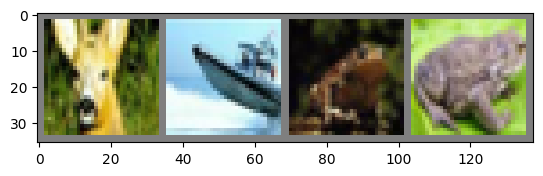

    Epoch / Minibatch: 1/1 out of 1/1563
    Epoch / Minibatch: 1/2 out of 1/1563
    Epoch / Minibatch: 1/3 out of 1/1563
    Epoch / Minibatch: 1/4 out of 1/1563
    Epoch / Minibatch: 1/5 out of 1/1563
    Epoch / Minibatch: 1/6 out of 1/1563
    Epoch / Minibatch: 1/7 out of 1/1563
    Epoch / Minibatch: 1/8 out of 1/1563
    Epoch / Minibatch: 1/9 out of 1/1563
    Epoch / Minibatch: 1/10 out of 1/1563
    Epoch / Minibatch: 1/11 out of 1/1563
    Epoch / Minibatch: 1/12 out of 1/1563
    Epoch / Minibatch: 1/13 out of 1/1563
    Epoch / Minibatch: 1/14 out of 1/1563
    Epoch / Minibatch: 1/15 out of 1/1563
    Epoch / Minibatch: 1/16 out of 1/1563
    Epoch / Minibatch: 1/17 out of 1/1563
    Epoch / Minibatch: 1/18 out of 1/1563
    Epoch / Minibatch: 1/19 out of 1/1563
    Epoch / Minibatch: 1/20 out of 1/1563
    Epoch / Minibatch: 1/21 out of 1/1563
    Epoch / Minibatch: 1/22 out of 1/1563
    Epoch / Minibatch: 1/23 out of 1/1563
    Epoch / Minibatch: 1/24 out of 1/1563
 

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Define transformations for images
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Fixed for RGB channels
])

# Download and load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Show sample images
dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images[:4]))

# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)  # Corrected input size
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model, loss, and optimizer
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
nEpochs = 1
for epoch in range(nEpochs):
    running_loss = 0.0
    batch = 0
    for images, labels in trainloader:
        batch += 1
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        print(f"    Epoch / Minibatch: {epoch+1}/{batch} out of {nEpochs}/{len(trainloader)}")
    print(f"Epoch {epoch+1}, Loss: {running_loss / len(trainloader)}")

print("Training complete!")

# Test the model
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Accuracy on test images: {accuracy:.2f}%")